In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import joblib


In [3]:
data = pd.read_csv('train.csv')

In [4]:
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [5]:
print(data.shape)
print(data.dtypes)

(14999, 9)
vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object


In [6]:
data = data.dropna()


In [7]:
data['published'] = pd.to_datetime(data['published'], errors='coerce')
data['publish_year'] = data['published'].dt.year
data['publish_month'] = data['published'].dt.month
data['publish_day'] = data['published'].dt.day
data = data.drop(columns=['published', 'vidid'])

In [8]:
label_encoder = LabelEncoder()
data['category'] = label_encoder.fit_transform(data['category'])

In [9]:
numeric_data = data.select_dtypes(include=[np.number])

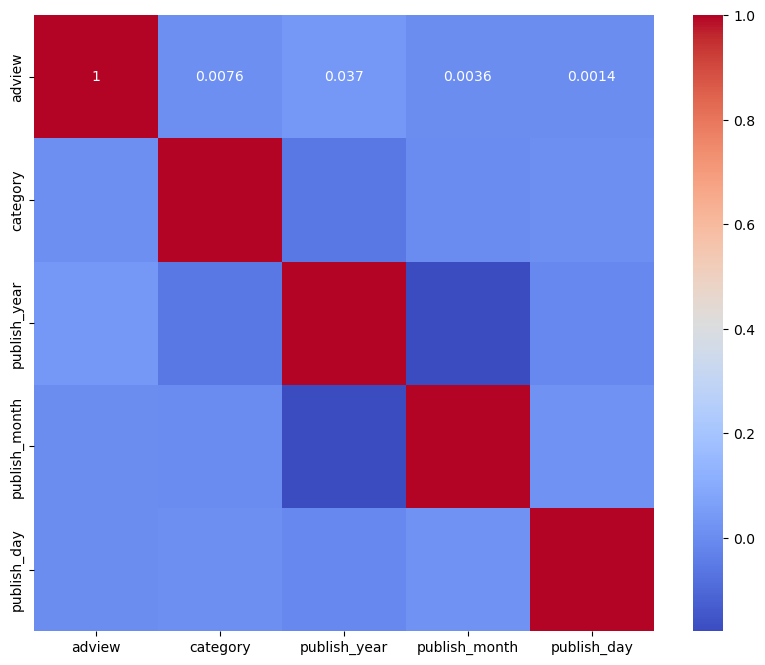

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
features = data.drop(columns=['adview'])
target = data['adview']

In [12]:
for column in features.columns:
    if features[column].dtype == 'object':
        print(f"Column {column} is not numeric. Converting...")
        features[column] = label_encoder.fit_transform(features[column])

Column views is not numeric. Converting...
Column likes is not numeric. Converting...
Column dislikes is not numeric. Converting...
Column comment is not numeric. Converting...
Column duration is not numeric. Converting...


In [13]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.15, random_state=42)


In [15]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

In [16]:
lr = LinearRegression()
lr_mae, lr_mse, lr_r2 = evaluate_model(lr, X_train, y_train, X_test, y_test)

In [17]:
svr = SVR(kernel='rbf')
svr_mae, svr_mse, svr_r2 = evaluate_model(svr, X_train, y_train, X_test, y_test)

In [18]:
dt = DecisionTreeRegressor(random_state=42)
dt_mae, dt_mse, dt_r2 = evaluate_model(dt, X_train, y_train, X_test, y_test)

In [19]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_mae, rf_mse, rf_r2 = evaluate_model(rf, X_train, y_train, X_test, y_test)

In [20]:
ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(32, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(1))

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
ann.compile(optimizer='adam', loss='mean_squared_error')
history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 1203073408.0000 - val_loss: 1045314496.0000
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1031107648.0000 - val_loss: 1045125248.0000
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 939305728.0000 - val_loss: 1044621504.0000
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 814978112.0000 - val_loss: 1043718848.0000
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 309345664.0000 - val_loss: 1042403264.0000
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 832172352.0000 - val_loss: 1041295168.0000
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1136868736.0000 - val_loss: 1040376448.0000
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 290204128.0000 - val_loss: 1039590720.0000
Epoch 9/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1358922880.0000 - val_loss: 1039085184.0000
Epoch 10/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27382700

In [22]:
ann_predictions = ann.predict(X_test)
ann_mae = mean_absolute_error(y_test, ann_predictions)
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [23]:
print("Linear Regression: MAE = {:.4f}, MSE = {:.4f}, R2 = {:.4f}".format(lr_mae, lr_mse, lr_r2))
print("Support Vector Regressor: MAE = {:.4f}, MSE = {:.4f}, R2 = {:.4f}".format(svr_mae, svr_mse, svr_r2))
print("Decision Tree Regressor: MAE = {:.4f}, MSE = {:.4f}, R2 = {:.4f}".format(dt_mae, dt_mse, dt_r2))
print("Random Forest Regressor: MAE = {:.4f}, MSE = {:.4f}, R2 = {:.4f}".format(rf_mae, rf_mse, rf_r2))
print("Artificial Neural Network: MAE = {:.4f}, MSE = {:.4f}, R2 = {:.4f}".format(ann_mae, ann_mse, ann_r2))

Linear Regression: MAE = 6125.2376, MSE = 14235462327.7719, R2 = 0.0004
Support Vector Regressor: MAE = 4243.5756, MSE = 14259562189.4036, R2 = -0.0013
Decision Tree Regressor: MAE = 5606.9324, MSE = 14450524958.3156, R2 = -0.0147
Random Forest Regressor: MAE = 5798.0211, MSE = 14238743869.4806, R2 = 0.0002
Artificial Neural Network: MAE = 5811.5573, MSE = 14229935526.1298, R2 = 0.0008


In [24]:
joblib.dump(rf, 'best_model_rf.pkl')

['best_model_rf.pkl']

In [25]:
best_model = joblib.load('best_model_rf.pkl')
test_predictions = best_model.predict(X_test)

In [26]:
final_mae = mean_absolute_error(y_test, test_predictions)
final_mse = mean_squared_error(y_test, test_predictions)
final_r2 = r2_score(y_test, test_predictions)

In [27]:
print("Final Model Evaluation: MAE = {:.4f}, MSE = {:.4f}, R2 = {:.4f}".format(final_mae, final_mse, final_r2))

Final Model Evaluation: MAE = 5798.0211, MSE = 14238743869.4806, R2 = 0.0002
